# Using yt for Visualization at OLCF

In [1]:
%matplotlib inline

### About yt

* yt is a python library for analysis and visualization of datasets from hydrodynamics codes
  - active, welcoming community of developers
  - http://yt-project.org/
* supports adaptive mesh refinement, unstructured grids, and more
* _frontends_ provided for many common codes (e.g., _BoxLib_, _Chombo_, _Enzo_, _Flash_, _Gadget_, ...)
  - any 3-d NumPy array can also be used
  - generic HDF5 support as well

- unlike VisIt or other codes, there is no GUI
- you write your visualization as a python script
  * you can also use ipython / jupyter notebooks

# Some Examples

In [2]:
import yt
yt.__version__

'3.4-dev'

In [3]:
yt.funcs.mylog.setLevel(50)

In [4]:
ds = yt.load("smallplt16623")
ds.print_stats()

level	# grids	       # cells	     # cells^3
----------------------------------------------
  0	   512	      16777216	           256
  1	   615	       6795264	           190
----------------------------------------------
   	  1127	      23572480


t = 1.63001201e+02 = 1.63001201e+02 s = 5.16519638e-06 years

Smallest Cell:
	Width: 6.482e-18 Mpc
	Width: 6.482e-12 pc
	Width: 1.337e-06 AU
	Width: 2.000e+07 cm


* fields in yt have units
  - these are usually defined in the frontend for the different codes
  - units are propagated through calculations using SymPy
* many common derived fields are also computed, depending on what exists on disk

In [5]:
ds.field_list

[('boxlib', 'Temp'), ('boxlib', 'density')]

In [6]:
ds.derived_field_list

[('boxlib', 'Temp'),
 ('boxlib', 'cell_volume'),
 ('boxlib', 'density'),
 ('boxlib', 'dx'),
 ('boxlib', 'dy'),
 ('boxlib', 'dz'),
 ('boxlib', 'path_element_x'),
 ('boxlib', 'path_element_y'),
 ('boxlib', 'path_element_z'),
 ('boxlib', 'vertex_x'),
 ('boxlib', 'vertex_y'),
 ('boxlib', 'vertex_z'),
 ('boxlib', 'x'),
 ('boxlib', 'y'),
 ('boxlib', 'z'),
 ('gas', 'H_nuclei_density'),
 ('gas', 'He_nuclei_density'),
 ('gas', 'averaged_density'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'density_gradient_y'),
 ('gas', 'density_gradient_z'),
 ('gas', 'dx'),
 ('gas', 'dy'),
 ('gas', 'dynamical_time'),
 ('gas', 'dz'),
 ('gas', 'emission_measure'),
 ('gas', 'entropy'),
 ('gas', 'kT'),
 ('gas', 'mazzotta_weighting'),
 ('gas', 'path_element_x'),
 ('gas', 'path_element_y'),
 ('gas', 'path_element_z'),
 ('gas', 'szy'),
 ('gas', 'temperature'),
 ('gas', 'vertex_x'),
 ('gas', 'vertex_y'),
 ('gas'

In [7]:
dd = ds.all_data()
dd.quantities.extrema(("boxlib", "density"))

YTArray([  3.20258364e-03,   1.85814420e+07]) g/cm**3

### Mesh

yt can explore the mesh structure for AMR datasets

In [8]:
print(ds.index.grid_left_edge)

[[ -5.12000000e+09  -5.12000000e+09  -5.12000000e+09]
 [  3.84000000e+09  -5.12000000e+09  -5.12000000e+09]
 [  2.56000000e+09  -5.12000000e+09  -5.12000000e+09]
 ..., 
 [ -3.20000000e+08   1.60000000e+09   0.00000000e+00]
 [  1.60000000e+09   6.40000000e+08   6.40000000e+08]
 [  1.60000000e+09   0.00000000e+00   6.40000000e+08]] code_length


### Metadata

* Many frontends store metadata (like input parameters, etc) in the plotfiles
* E.g., BoxLib plotfiles store the git hashes of the source used to build the executable

In [9]:
keys = [key for key in ds.parameters.keys() if "hash" in key]
for k in keys:
    print(k, ds.parameters[k])

('wdmerger git hash', '7aa52effdabf7e9dd944f7d93aaae59547b7ea98')
('Castro   git hash', '3b3824ed64fb7f94134718f3a0b5d7cb8c307573')
('BoxLib   git hash', '3bccd760d7c027b9ce7533d08fd8c549dc314c9a')


# Plotting


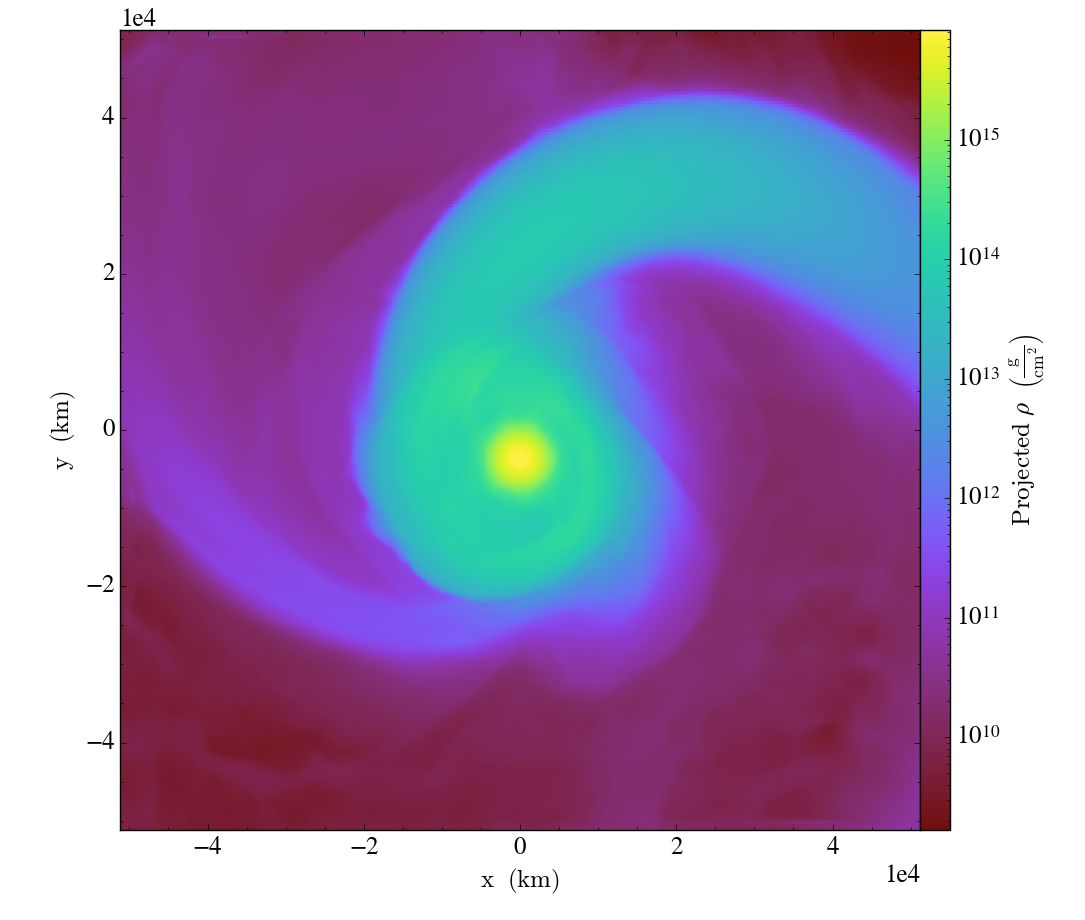

In [10]:
p = yt.ProjectionPlot(ds, "z", "density")
d = p.show()

This is a projection plot -- the integral along a particular direction.  You can weight the integration by some quantity (like density) using the `method` keyword.